<a href="https://colab.research.google.com/github/Kaizzen42/InsideDLBook/blob/main/InsideDL_chap_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.autonotebook import tqdm
import pandas as pd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  after removing the cwd from sys.path.


In [4]:
import torch


In [5]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([4,5,6,7])
torch_matrix = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])
torch_tensor3d = torch.tensor([[[11,12,13], [21,22,23]], [[41,42,43],[51,52,53]]])

In [6]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)
# To get the value of a number from a tensor, use the item function
print(f"\n{torch_scalar.item()}")

torch.Size([])
torch.Size([4])
torch.Size([4, 3])
torch.Size([2, 2, 3])

3.140000104904175


In [7]:
x_np = np.random.random((4,4))
print(x_np)
print(x_np.shape)
x_pt = torch.tensor(x_np)
print(x_pt)
print(x_pt.shape)

[[0.86297053 0.76624405 0.41167959 0.32637273]
 [0.44151968 0.31696295 0.98646988 0.13008474]
 [0.04645768 0.30250799 0.93234104 0.04627548]
 [0.45831876 0.99485232 0.26038648 0.83495306]]
(4, 4)
tensor([[0.8630, 0.7662, 0.4117, 0.3264],
        [0.4415, 0.3170, 0.9865, 0.1301],
        [0.0465, 0.3025, 0.9323, 0.0463],
        [0.4583, 0.9949, 0.2604, 0.8350]], dtype=torch.float64)
torch.Size([4, 4])


In [ ]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [ ]:
x_np_32 = np.asarray(x_np, dtype=np.float32)
x_pt_32 = torch.tensor(x_np_32, dtype=torch.float32)
print(x_np_32, x_pt_32)

[[4.1151717e-01 4.6934077e-01 2.1388388e-01 9.2504072e-01]
 [3.5039705e-01 5.9351414e-01 8.0826998e-01 3.0356187e-01]
 [8.3588886e-01 8.0560887e-05 8.2838225e-01 6.9451237e-01]
 [3.4332335e-01 6.2643468e-01 9.0887529e-01 7.1360528e-01]] tensor([[4.1152e-01, 4.6934e-01, 2.1388e-01, 9.2504e-01],
        [3.5040e-01, 5.9351e-01, 8.0827e-01, 3.0356e-01],
        [8.3589e-01, 8.0561e-05, 8.2838e-01, 6.9451e-01],
        [3.4332e-01, 6.2643e-01, 9.0888e-01, 7.1361e-01]])


In [ ]:
print(torch_tensor3d)
torch_tensor3d_t = torch.transpose(torch_tensor3d, 0, 2)
print(torch_tensor3d_t.shape)
print(torch_tensor3d_t)

tensor([[[11, 12, 13],
         [21, 22, 23]],

        [[41, 42, 43],
         [51, 52, 53]]])
torch.Size([3, 2, 2])
tensor([[[11, 41],
         [21, 51]],

        [[12, 42],
         [22, 52]],

        [[13, 43],
         [23, 53]]])


In [ ]:
import timeit
x = torch.rand(2**11, 2**11)
print(x.shape)

torch.Size([2048, 2048])


In [ ]:
x[0,0]

tensor(0.6696)

In [ ]:
x[0,:]

tensor([0.6696, 0.4970, 0.6232,  ..., 0.3375, 0.0344, 0.7150])

In [ ]:
x[:,0]

tensor([0.6696, 0.4741, 0.0901,  ..., 0.5055, 0.5008, 0.3552])

In [ ]:
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [ ]:
time_cpu

74.55946267500002

In [ ]:
# current_device = torch.cuda.get_device_name()
# print(f"Current device = {current_device}")

# gpu_Available = torch.cuda.is_available()
# print("Is CUDA available? :", gpu_Available)

# if gpu_Available:
#   device = torch.device("cuda")
# else:
#   device = current_device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")

In [ ]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)
time_gpu

74.11346212500007

In [ ]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move
    its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj
    
some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))


[tensor(1), tensor(2)]
[tensor(1), tensor(2)]


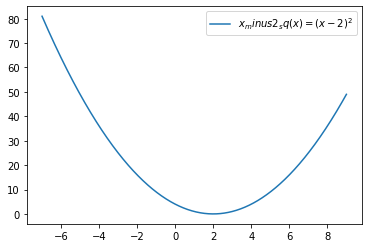

In [ ]:
def x_minus2_sq(x):
  return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,1000)
y_axis_vals = x_minus2_sq(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="$x_minus2_sq(x)=(x-2)^2$")


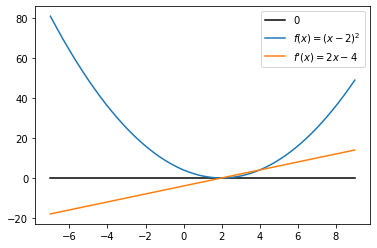

In [ ]:
def x_minus2_sq_P(x):
  return 2*x-4.0

y_axis_vals_p = x_minus2_sq_P(torch.tensor(x_axis_vals)).numpy()
#First, lets draw a black line at 0, so that we can easily
# tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals),
label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals,
label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p,
label="$f’(x)=2 x - 4$")

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)
 
x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
eta = 0.1
 
while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that
    #x_prev and x_cur don't point to the same object
    
    #Compute our function, gradient, and update
    value = x_minus2_sq(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as
    #py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)


tensor([2.0000])


In [ ]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param], lr=eta)

In [ ]:
num_epochs = 61
param_updates = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  loss_incurred = x_minus2_sq(x_param)
  if epoch == 0:
    print(f"Type of loss incurred = {type(loss_incurred)}")
  loss_incurred.backward()
  optimizer.step() # this means the parameters would get updated using the learning rate and gradient.
  param_updates.append(x_param.data.item())
  if epoch %10 == 0:
    print(f"{epoch}: {x_param.data}")

Type of loss incurred = <class 'torch.Tensor'>
0: tensor([-2.4000])
10: tensor([1.5276])
20: tensor([1.9493])
30: tensor([1.9946])
40: tensor([1.9994])
50: tensor([1.9999])
60: tensor([2.0000])


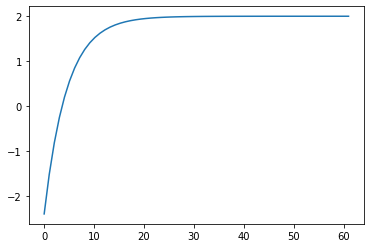

In [ ]:
sns.lineplot(x=np.linspace(0,61,61), y=param_updates)

In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Loading the MNIST dataset


X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)

(70000, 784)


In [ ]:
class SimpleDataset(Dataset):
  def __init__(self, X, y):
    super(SimpleDataset, self).__init__()
    self.X = X
    self.y = y

  def __getitem__(self, index):
    inputs = torch.tensor(self.X.iloc[index,:], dtype=torch.float32)
    targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
    return inputs, targets

  def __len__(self):
    return self.X.shape[0]

  

In [ ]:
dataset = SimpleDataset(X,y)

In [ ]:
X.iloc[0,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [ ]:
print("Length: ", len(dataset))
example, label = dataset.__getitem__(0)

print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)


Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


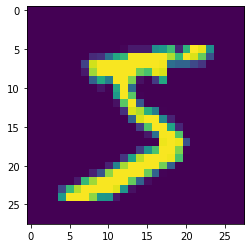

In [ ]:
plt.imshow(example.reshape((28,28)))

In [ ]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size
 
train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))


56000 examples for training and 14000 for testing


Exercises begin here. https://livebook.manning.com/book/inside-deep-learning/chapter-1/v-10/point-14108-172-172-0 

In [ ]:
# 1. Write a series of for loops that compute the average value in torch_tensor3d
print(torch_tensor3d)
sum_3d = 0.0
for b in range(torch_tensor3d.shape[0]):
  for w in range(torch_tensor3d.shape[1]):
    for h in range(torch_tensor3d.shape[2]):
      sum_3d += torch_tensor3d[b][w][h]
print(f"Average = {sum_3d/torch_tensor3d.numel()}")



tensor([[[11, 12, 13],
         [21, 22, 23]],

        [[41, 42, 43],
         [51, 52, 53]]])
Average = 32.0


In [ ]:
# 2. Write code that indexes into torch_tensor3d and prints out the value “13”.

print(torch_tensor3d[0][0][2].item())


13


In [ ]:
# 3. For every power of 2 (i.e., i or 2**i ) up to 2^11, create a random matrix X ∈ ℝ2^i, 
# 2^i (i.e., X.shape should give (2**i, 2**i)). Time how long it takes to compute X X (i.e., X @ X) 
# on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU?

cpu_times = []
for exp in range(11):
  side = 2**exp
  mat_x = torch.rand((side, side))
  time_cpu = timeit.timeit("mat_x@mat_x", globals=globals())
  print(f"Shape = {mat_x.shape} time = {time_cpu} seconds")
  cpu_times.append(time_cpu)

Shape = torch.Size([1, 1]) time = 2.979190419999213 seconds
Shape = torch.Size([2, 2]) time = 3.1341822079994017 seconds
Shape = torch.Size([4, 4]) time = 3.173355848997744 seconds
Shape = torch.Size([8, 8]) time = 3.487799227001233 seconds
Shape = torch.Size([16, 16]) time = 4.030215064998629 seconds
Shape = torch.Size([32, 32]) time = 7.503608662998886 seconds
Shape = torch.Size([64, 64]) time = 29.172384212997713 seconds
Shape = torch.Size([128, 128]) time = 201.93375202100287 seconds


KeyboardInterrupt: ignored

In [ ]:

# 3. For every power of 2 (i.e., i or 2**i ) up to 2^11, create a random matrix X ∈ ℝ2^i, 
# 2^i (i.e., X.shape should give (2**i, 2**i)). Time how long it takes to compute X X (i.e., X @ X) 
# on a CPU and on a GPU and plot the speedup. For what sized matrices is the CPU faster than the GPU?

gpu_times = []
for exp in range(11):
  side = 2**exp
  mat_x = torch.rand((side, side))
  moveTo(mat_x, device)
  time_gpu = timeit.timeit("mat_x@mat_x", globals=globals())
  print(f"Shape = {mat_x.shape} time = {time_gpu} seconds")
  gpu_times.append(time_gpu)

Shape = torch.Size([1, 1]) time = 2.8066383080000037 seconds
Shape = torch.Size([2, 2]) time = 3.2974687300000483 seconds
Shape = torch.Size([4, 4]) time = 3.328247248000025 seconds
Shape = torch.Size([8, 8]) time = 3.3983864729999596 seconds
Shape = torch.Size([16, 16]) time = 3.4297066249999943 seconds
Shape = torch.Size([32, 32]) time = 4.289262048000012 seconds
Shape = torch.Size([64, 64]) time = 10.598849075999965 seconds
Shape = torch.Size([128, 128]) time = 77.04188489300003 seconds
Shape = torch.Size([256, 256]) time = 469.70090312400004 seconds


# There are m * n * p calculations in a matrix multiplication.
# The 128*128 matrix multiplied by itself was 128^3 calculations.
# Similarly, the 256*256 matrix multiplied by itself was 256^3 calculations.
# That's a factor of 8x. The time taken has gone from 77 seconds to 469 seconds, also a factor of almost 8x. So the GPU is at full capacity, and will take another 50 ish minutes to get the next answer. And then 7 hours for the next one, and so on. These numbers are significantly better than those on the CPU.

In [ ]:
def complex_f1(x):
  return torch.sin(x-2)*((x+2)**2) + torch.sqrt(torch.abs(torch.cos(x)))

In [ ]:
print(complex_f1(torch.tensor(0)))
print(complex_f1(torch.tensor(1)))
print(complex_f1(torch.tensor(10)))
print(complex_f1(torch.tensor(1000)))
print(complex_f1(torch.tensor(-1)))
print(complex_f1(torch.tensor(-10)))
print(complex_f1(torch.tensor(-1000)))

tensor(-2.6372)
tensor(-6.8382)
tensor(143.3836)
tensor(-858897.7500)
tensor(0.5939)
tensor(35.2567)
tensor(-166597.4062)


In [ ]:
x_param = torch.nn.Parameter(torch.tensor([0.0]), requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param], lr=eta)

In [ ]:
%%time
num_epochs = 30
param_updates = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  loss_incurred = complex_f1(x_param)
  if epoch == 0:
    print(f"Type of loss incurred = {type(loss_incurred)}")
  loss_incurred.backward()
  optimizer.step() # this means the parameters would get updated using the learning rate and gradient.
  param_updates.append(x_param.data.item())
  # if epoch %10 == 0:
  print(f"{epoch}: {x_param.data}")

Type of loss incurred = <class 'torch.Tensor'>
0: tensor([0.5302])
1: tensor([0.9963])
2: tensor([1.0764])
3: tensor([1.0605])
4: tensor([1.0642])
5: tensor([1.0634])
6: tensor([1.0636])
7: tensor([1.0635])
8: tensor([1.0635])
9: tensor([1.0635])
10: tensor([1.0635])
11: tensor([1.0635])
12: tensor([1.0635])
13: tensor([1.0635])
14: tensor([1.0635])
15: tensor([1.0635])
16: tensor([1.0635])
17: tensor([1.0635])
18: tensor([1.0635])
19: tensor([1.0635])
20: tensor([1.0635])
21: tensor([1.0635])
22: tensor([1.0635])
23: tensor([1.0635])
24: tensor([1.0635])
25: tensor([1.0635])
26: tensor([1.0635])
27: tensor([1.0635])
28: tensor([1.0635])
29: tensor([1.0635])
CPU times: user 20.8 ms, sys: 992 µs, total: 21.8 ms
Wall time: 23.7 ms


In [ ]:
def complex_f2(x, y):
  return (torch.pow(torch.e, torch.pow(torch.sin(x), 2)) / torch.pow((x-y), 2) ) + torch.pow((x-y), 2)


In [ ]:

complex_f2(torch.tensor(0.2), torch.tensor(10.0))

tensor(96.0508)

In [ ]:
%%time

x_param = torch.nn.Parameter(torch.tensor([0.2]), requires_grad=True)
y_param = torch.nn.Parameter(torch.tensor([10.0]), requires_grad=True)
optimizer = torch.optim.SGD(params=[x_param, y_param], lr=eta)

num_epochs = 60
param_updates = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  loss_incurred = complex_f2(x_param, y_param)
  if epoch == 0:
    print(f"Type of loss incurred = {type(loss_incurred)}")
  loss_incurred.backward()
  optimizer.step() # this means the parameters would get updated using the learning rate and gradient.
  param_updates.append((x_param.data.item(), y_param.data.item()))
  # if epoch %10 == 0:
  print(f"{epoch}: {x_param.data} {y_param.data}")

Type of loss incurred = <class 'torch.Tensor'>
0: tensor([2.1594]) tensor([8.0402])
1: tensor([3.3389]) tensor([6.8660])
2: tensor([4.0364]) tensor([6.1653])
3: tensor([4.3845]) tensor([5.7776])
4: tensor([4.4049]) tensor([5.6803])
5: tensor([4.3329]) tensor([5.6643])
6: tensor([4.3064]) tensor([5.5988])
7: tensor([4.2484]) tensor([5.5558])
8: tensor([4.2065]) tensor([5.4934])
9: tensor([4.1521]) tensor([5.4377])
10: tensor([4.1047]) tensor([5.3735])
11: tensor([4.0521]) tensor([5.3119])
12: tensor([4.0035]) tensor([5.2466])
13: tensor([3.9531]) tensor([5.1832])
14: tensor([3.9056]) tensor([5.1190])
15: tensor([3.8581]) tensor([5.0570])
16: tensor([3.8131]) tensor([4.9959])
17: tensor([3.7691]) tensor([4.9374])
18: tensor([3.7274]) tensor([4.8808])
19: tensor([3.6871]) tensor([4.8270])
20: tensor([3.6490]) tensor([4.7758])
21: tensor([3.6126]) tensor([4.7275])
22: tensor([3.5783]) tensor([4.6818])
23: tensor([3.5457]) tensor([4.6391])
24: tensor([3.5152]) tensor([4.5990])
25: tensor([3